In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Uploading identity dataset from google drive
! gdown --id 1pvxYTXmJIhnco3Zdwn39aW4OnYQy9MuK

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1pvxYTXmJIhnco3Zdwn39aW4OnYQy9MuK
To: /content/train_identity.csv
100% 23.1M/23.1M [00:00<00:00, 92.4MB/s]


In [ ]:
# Uploading transaction dataset from google drive
! gdown --id 1i2sjz8bH3o4vaX4Y_S-_5edQxQTcOmOz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1i2sjz8bH3o4vaX4Y_S-_5edQxQTcOmOz
To: /content/train_transaction.csv
100% 420M/420M [00:01<00:00, 225MB/s]


## 1. Setup Environment


The goal of this section is to:

- Import all the packages
- Set the options for data visualizations

In [ ]:
#Data Manipulation
import numpy as np 
import pandas as pd 

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Time
import time
import datetime

import gc
import warnings
from  tqdm.notebook import tqdm_notebook


# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline
warnings.filterwarnings("ignore")

# 2. Data Overview


- Load the datasets 
- Explore the features

The data is broken into two files **identity** and **transaction**, which are joined by “TransactionID”. 

**Note:** Not all transactions have corresponding identity information.

Load the transaction and identity datasets using pd.read_csv()

In [ ]:
%%time
# Load Data
df_id   = pd.read_csv('/content/train_identity.csv')

CPU times: user 566 ms, sys: 178 ms, total: 744 ms
Wall time: 741 ms


In [ ]:
df_id.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
df_id.shape

(144233, 41)

### Identity Data Description

- Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
- They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
- DeviceType
- DeviceInfo
- id_1 - id_38

In [ ]:
%%time
df_tran = pd.read_csv('/content/train_transaction.csv')

CPU times: user 22.2 s, sys: 5.92 s, total: 28.1 s
Wall time: 28 s


In [ ]:
df_tran.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,

In [ ]:
print(df_tran.shape)

(590540, 394)


### Transaction Data Description
- __TransactionDT__: timedelta from a given reference datetime (not an actual timestamp)
- __TransactionAMT__: transaction payment amount in USD
- __ProductCD__: product code, the product for each transaction
- __card1 - card6__: payment card information, such as card type, card category, issue bank, country, etc.
- __addr__: address
- __dist__: distance
- **P_ and (R__) emaildomain**: purchaser and recipient email domain
- __C1-C14__: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- __D1-D15__: timedelta, such as days between previous transaction, etc.
- __M1-M9__: match, such as names on card and address, etc.
- __Vxxx__: Vesta engineered rich features, including ranking, counting, and other entity relations.

# 3. Memory Optimisation of dataset

In [ ]:
# Memory occupied by the dataframe (in mb)
df_id.memory_usage(deep=True).sum() / 1024**2  

157.63398933410645

In [ ]:
df_tran.memory_usage(deep=True).sum() / 1024**2

2100.701406478882

In [ ]:
df_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  int64  
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [ ]:
df_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(362), int64(18), object(14)
memory usage: 1.7+ GB


In [ ]:
df_tran.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                  int64
C2                  int64
C3                  int64
C4                  int64
C5                  int64
C6                  int64
C7                  int64
C8                  int64
C9                  int64
C10                 int64
C11                 int64
C12                 int64
C13                 int64
C14                 int64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float64
D8          

Certain features occupy more memory than what is needed to store them. Reducing the memory usage by changing data type will speed up the computations.

Let's create a function for that:

- int8 / uint8 : consumes 1 byte of memory, range between -128/127 or 0/255
- bool : consumes 1 byte, true or false
- float16 / int16 / uint16: consumes 2 bytes of memory, range between -32768 and 32767 or 0/65535
- float32 / int32 / uint32 : consumes 4 bytes of memory, range between -2147483648 and 2147483647
- float64 / int64 / uint64: consumes 8 bytes of memory

In [ ]:
print('int8 min: ', np.iinfo(np.int8).min)
print('int8 max: ', np.iinfo(np.int8).max)

int8 min:  -128
int8 max:  127


In [ ]:
print('int64 min: ', np.iinfo(np.int64).min)
print('int64 max: ', np.iinfo(np.int64).max)

int64 min:  -9223372036854775808
int64 max:  9223372036854775807


In [ ]:
print('float32 min: ', np.finfo(np.float32).min)
print('float32 max: ', np.finfo(np.float32).max)

float32 min:  -3.4028235e+38
float32 max:  3.4028235e+38


In [ ]:
# Create reduce memory usage function
def reduce_mem_usage(df, verbose=True):

  #define list of datatypes that are required to optimise
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    #Initialise variable 'start_mem' to store initial memory occupied by dataframe
    start_mem = df.memory_usage(deep=True).sum() / 1024**2   

    #Iterate through all columns in dataframe 
    for col in df.columns:
        col_type = df[col].dtypes

        #Check datatype in list 'numerics'
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            #Compare the memory usage of each column and assign the neccessary datatype to that column 
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)  

     #Store the Optimised memory used by dataframe in 'end_mem' variable           
    end_mem = df.memory_usage(deep=True).sum() / 1024**2

    if verbose: 
      print('Memory usage decreased and optimised to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

Use the defined function 'reduce_mem_usage' to reduce the memory usage

In [ ]:
# Optimised memory size of the dataframe 'df_id'
df_id   = reduce_mem_usage(df_id)

Memory usage decreased and optimised to 138.24 Mb (12.3% reduction)


In [ ]:
# Optimised memory size of the dataframe 'df_tran'
df_tran = reduce_mem_usage(df_tran)

Memory usage decreased and optimised to 867.33 Mb (58.7% reduction)


In [ ]:
%%time
# Load Data
df_id   = pd.read_csv('/content/train_identity.csv')

CPU times: user 333 ms, sys: 22 ms, total: 355 ms
Wall time: 353 ms


In [ ]:
%%time
df_tran = pd.read_csv('/content/train_transaction.csv')

CPU times: user 10 s, sys: 1.53 s, total: 11.5 s
Wall time: 11.7 s


## Summary of Memory Optimisation

- df_id: Memory usage decreased and optimised to 138.38 Mb (12.3% reduction)
- df_tran: Memory usage decreased and optimised to 867.33 Mb (58.7% reduction)
- Initial CPU time of df_id when reading dataframe was 545 milli sec and Optimised CPU time of df_id is 489 milli sec
- Initial CPU time of df_tran when reading dataframe was 27 sec and Optimised CPU time of df_tran is 20 sec

# 4. Dataset Statistics

Before attempting to solve the problem, it's very important to have a good understanding of data.

The goal of this section is to:
- Check Dimensions/Shape of data
- Check Summary of data
- Check Descriptive statistics of data
- Check Class Imbalance of Target Variable

#### Shape of dataframe

In [ ]:
# Dimensions of identity dataset
print(df_id.shape)

(144233, 41)


The dataframe 'df_id' has 144233 rows and 41 columns

In [ ]:
# Dimensions of transaction dataset
print(df_tran.shape)

(590540, 394)


The dataframe 'df_tran' has 590540 rows and 394 columns

#### Summary of Dataframe

In [ ]:
df_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
!pip install pandas_summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 14.0 MB/s 


#### Descriptive Statistics on Identity Dataframe 'df_id'


In [ ]:
#from pandas_summary import DataFrameSummary
#df_id_summary = DataFrameSummary(df_id)
#df_id_summary.summary()

- By looking at the summary of dataframe df_id, it's clear there is are alot of missing values in the dataset. 

#### Descriptive Statistics on Transaction Dataframe 'df_tran'


In [ ]:
#from pandas_summary import DataFrameSummary
#df_tran_summary = DataFrameSummary(df_tran)
#df_tran_summary.summary()

#### Class Imbalance of Target Variable

In [ ]:
df_tran['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [ ]:
df_tran['isFraud'].value_counts(normalize = True)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

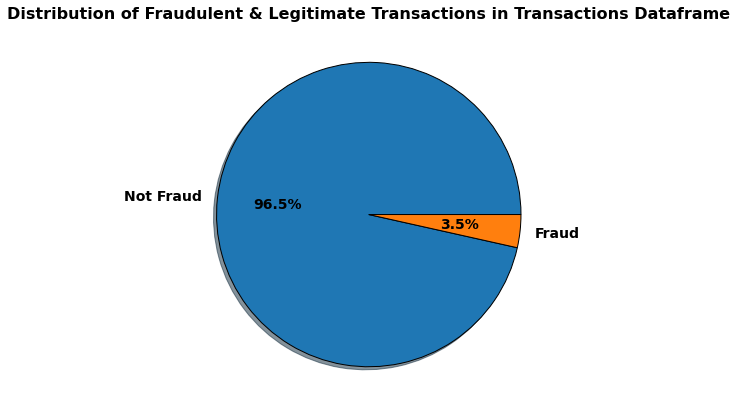

In [ ]:
plt.figure(figsize=(14,7))
proportion = df_tran['isFraud'].value_counts()
labels = ['Not Fraud','Fraud']
plt.title('Distribution of Fraudulent & Legitimate Transactions in Transactions Dataframe',fontsize = 16, weight = 'bold')
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'},textprops= { 'fontsize': 14,'weight' : 'bold'});

**Inferences on Data**

Lot of interesting things can be observed here:

- Rows in identity dataset are less than transaction dataset, that means only a subset of transactions in transactions dataset has identity data 
- Both datasets have the common and unique key as TransactionID, both can be joined at this unique key
- id_24, id_25, dist2, D7 and many more columns have 90%+ missing values, which means that these columns are probably useless so need to drop it for now
- Columns from V1 to V339 in transaction dataset are numeric whereas columns from id_01 to id_39 are of mixed datatype
- TransactionDT column is a timedelta from a given reference datetime (not an actual timestamp). But reference datetime is not known, so need to assume it and convert it to date format
- Target class is highly imbalanced about 96.5% transactions are legitimate and only 3.5% transactions are fraud.

# 5. Data Preprocessing for EDA

The goal of this section is to:
- Merge two datasets
- Drop the columns based on the inferences from previous section
- Create date features from transaction date 

Let's start with the first task to merge datasets to form one.


### Merging two Dataframes

In [ ]:
# Merge transaction dataframe and identity dataframe into one main dataframe for better EDA 
df = df_tran.merge(df_id, how='left', on='TransactionID')

# In del method, objects are no longer accessible for the given code. But, the objects are still there in the memory.
# To overcome this issue, gc.collect() method is used to clear the memory and prevent the overflow of memory.

del df_tran, df_id

collected = gc.collect()

print("Garbage collector collected {} objects".format(collected))

Garbage collector collected 1992 objects


In [ ]:
# Dimensions of training dataset
df.shape

(590540, 434)

Since left join was performed on transaction dataset, number of rows are same as transaction dataset.

### Adding Missing Flag to Columns

In [ ]:
# Add flag column for missing values
for col in df.columns:

   #Checks each row in a column has missing value or not. If missing returs True else False
    df[col+"_missing_flag"] = df[col].isnull()
    
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,...,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,V135_missing_flag,V136_missing_flag,V137_missing_flag,V138_missing_flag,V139_missing_flag,V140_missing_flag,V141_missing_flag,V142_missing_flag,V143_missing_flag,V144_missing_flag,V145_missing_flag,V146_missing_flag,V147_missing_flag,V148_missing_flag,V149_missing_flag,V150_missing_flag,V151_missing_flag,V152_missing_flag,V153_missing_flag,V154_missing_flag,V155_missing_flag,V156_missing_flag,V157_missing_flag,V158_missing_flag,V159_missing_flag,V160_missing_flag,V161_missing_flag,V162_missing_flag,V163_missing_flag,V164_missing_flag,V165_missing_flag,V166_missing_flag,V167_missing_flag,V168_missing_flag,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_missing_flag,V205_missing_flag,V206_missing_flag,V207_missing_flag,V208_missing_flag,V209_missing_flag,V210_missing_flag,V211_missing_flag,V212_missing_flag,V213_missing_flag,V214_missing_flag,V215_missing_flag,V216_missing_flag,V217_missing_flag,V218_missing_flag,V219_missing_flag,V220_missing_flag,V221_missing_flag,V222_missing_flag,V223_missing_flag,V224_missing_flag,V225_missing_flag,V226_missing_flag,V227_missing_flag,V228_missing_flag,V229_missing_flag,V230_missing_flag,V231_missing_flag,V232_missing_flag,V233_missing_flag,V234_missing_flag,V235_missing_flag,V236_missing_flag,V237_missing_flag,V238_missing_flag,V239_missing_flag,V240_missing_flag,V241_missing_flag,V242_missing_flag,V243_missing_flag,V244_missing_flag,V245_missing_flag,V246_missing_flag,V247_missing_flag,V248_missing_flag,V249_missing_flag,V250_missing_flag,V251_missing_flag,V252_missing_flag,V253_missing_flag,V254_missing_flag,V255_missing_flag,V256_missing_flag,V257_missing_flag,V258_missing_flag,V259_missing_flag,V260_missing_flag,V261_missing_flag,V262_missing_flag,V263_missing_flag,V264_missing_flag,V265_missing_flag,V266_missing_flag,V267_missing_flag,V268_missing_flag,V269_missing_flag,V270_missing_flag,V271_missing_flag,V272_missing_flag,V273_missing_flag,V274_missing_flag,V275_missing_flag,V276_missing_flag,V277_missing_flag,V278_missing_flag,V279_missing_flag,V280_missing_flag,V281_missing_flag,V282_missing_flag,V283_missing_flag,V284_missing_flag,V285_missing_flag,V286_missing_flag,V287_missing_flag,V288_missi

## Cleaning Data

- Let's drop the columns which may not be useful for our analysis

- Create a missing value flag column for the columns we are dropping which have more than 90% missing values, there might be some specific pattern associated with missing values and transaction being fraud

In [ ]:
#Create an empty list
drop_cols = []

#Iterate through all columns in dataframe
for col in df.columns:
    missing_share = df[col].isnull().sum()/df.shape[0]

    # Drop the columns where one category contains more than 90% values
    if missing_share > 0.9:
        drop_cols.append(col)
        print(col)
        # df[col + "_missing_flag"] = df[col].isnull()
    
good_cols = [col for col in df.columns if col not in drop_cols]    

dist2
D7
id_07
id_08
id_18
id_21
id_22
id_23
id_24
id_25
id_26
id_27


Remove the columns which doesn't having any unique values (variance)



In [ ]:
# Drop the columns which have only one unique value
drop_cols = []
for col in good_cols:
    unique_value = df[col].nunique()
    if unique_value == 1:
        drop_cols.append(col)
        print(col)
good_cols = [col for col in good_cols if col not in drop_cols]

TransactionID_missing_flag
isFraud_missing_flag
TransactionDT_missing_flag
TransactionAmt_missing_flag
ProductCD_missing_flag
card1_missing_flag
C1_missing_flag
C2_missing_flag
C3_missing_flag
C4_missing_flag
C5_missing_flag
C6_missing_flag
C7_missing_flag
C8_missing_flag
C9_missing_flag
C10_missing_flag
C11_missing_flag
C12_missing_flag
C13_missing_flag
C14_missing_flag


Filter the dataset with only good columns which are need for Exploratory Data Analysis 

In [ ]:
# Filter the data for relevant columns only
df = df[good_cols]

In [ ]:
# Dimentions of data
df.shape

(590540, 836)

## Creating Date Features

Let's create date features from TransactionDT features

In [ ]:
# Date features
START_DATE         = '2017-12-01'
startdate          = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")

#Creating Date Feature
df["Date"]         = df['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))

In [ ]:
#Creating three additional features to check probability of fradulent transactions on certain time

#Weekday of week
df['_Weekdays']    = df['Date'].dt.dayofweek

#Hour of Day
df['_Hours']       = df['Date'].dt.hour

#Day of Month
df['_Days']        = df['Date'].dt.day

In [ ]:
df.shape

(590540, 840)

In [ ]:
# Memory occupied by the dataframe (in mb)
df.memory_usage(deep=True).sum() / 1024**2 

2741.316358566284

In [ ]:
df = reduce_mem_usage(df)

Memory usage decreased and optimised to 1453.32 Mb (47.0% reduction)


# 6. Exploratory Data Analysis

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful to explain / predict the y variables. 

Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

The goal of this section is to:
- Check if the target variable is balanced or is there a need to balance the target variable
- Analyze the transaction amount
- Get insights or relationships from the data which would be useful from business perspective.

### Distribution of Target Variable

In [ ]:
# Get count of target class
df['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

Let's check the distribution of target class using a bar plot and check the proportion of transactions amounts being fraud.

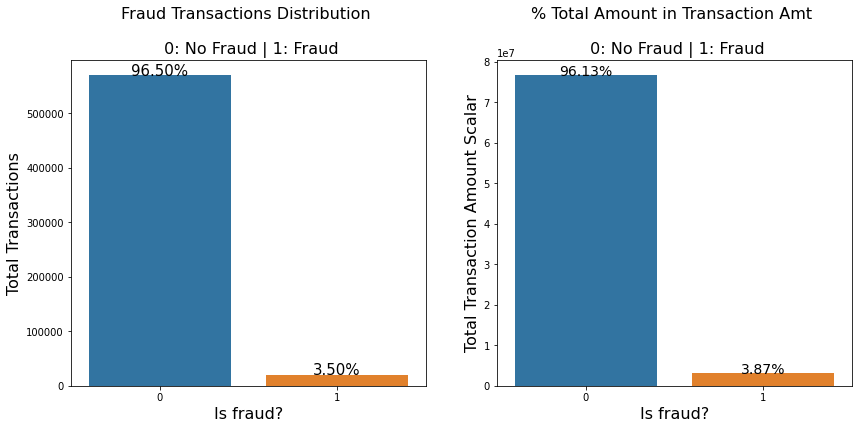

In [ ]:
# Draw a countplot to check the distribution of target variable
df['TransactionAmt'] = df['TransactionAmt'].astype(float)
total = len(df)
total_amt = df.groupby(['isFraud'])['TransactionAmt'].sum().sum()
plt.figure(figsize=(14,6))

plt.subplot(121)
g = sns.countplot(x='isFraud', data=df )
g.set_title("Fraud Transactions Distribution \n\n 0: No Fraud | 1: Fraud", fontsize=16)
g.set_xlabel("Is fraud?", fontsize=16)
g.set_ylabel('Total Transactions', fontsize=16)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 

perc_amt = (df.groupby(['isFraud'])['TransactionAmt'].sum())
perc_amt = perc_amt.reset_index()

plt.subplot(122)
g1 = sns.barplot(x='isFraud', y='TransactionAmt',  dodge=True, data=perc_amt)
g1.set_title("% Total Amount in Transaction Amt \n\n 0: No Fraud | 1: Fraud", fontsize=16)
g1.set_xlabel("Is fraud?", fontsize=16)
g1.set_ylabel('Total Transaction Amount Scalar', fontsize=16)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=14) 
    
plt.show()

In [ ]:
# Average Transaction Amount by Y
df.groupby('isFraud')['TransactionAmt'].mean()

isFraud
0    134.511857
1    149.244353
Name: TransactionAmt, dtype: float64

**Inferences:**

- The target variable 'isFraud' is **imbalanced** and has 3.5% transactions are Fraud
- Around 3.87% of Transaction Amounts are Fraud
- Average Legitimate Transaction Amount is 134.5 and Fraud Transaction Amount is 149.2. Hence, we can observe that Average Fraudulent Transaction Amount is higher than Legitimate Transaction Amount i.e Fradulent transaction occur when Transaction Amount is higher.




### Distribution of Transaction Amount

Text(0, 0.5, 'Probability')

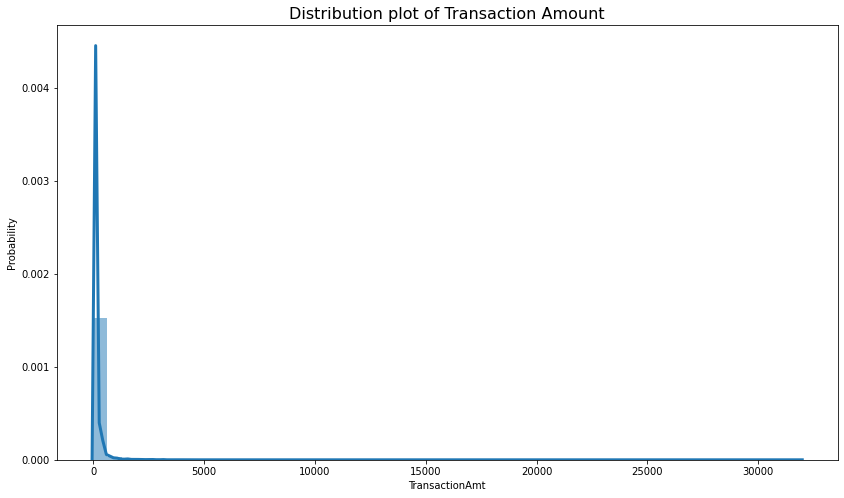

In [ ]:
# Distribution plot of Transaction Amount
plt.figure(figsize=(14,8))

sns.distplot(df['TransactionAmt'],bins = 50,kde_kws= {'lw': 3},hist_kws= {'alpha' : 0.5})
plt.title("Distribution plot of Transaction Amount",fontsize=16)
plt.ylabel("Probability")

There are certain transactions which are of very high amount, let's remove those to check the distribution

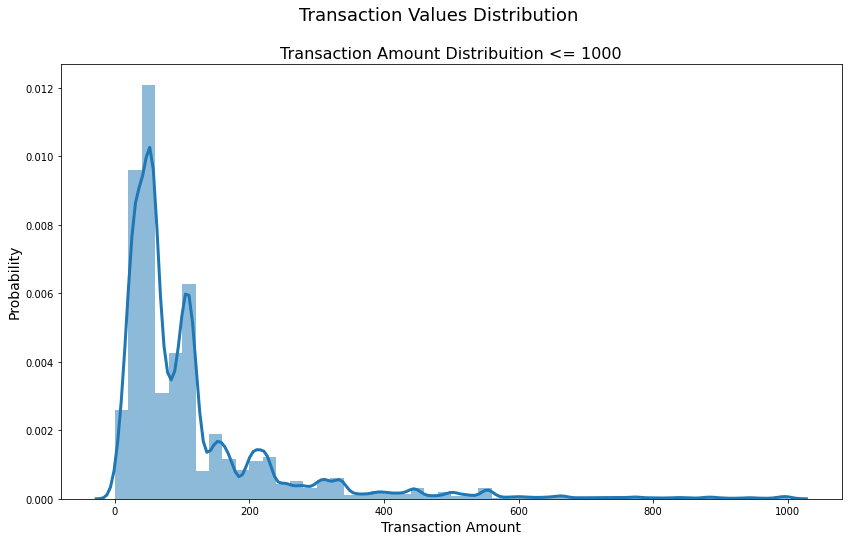

In [ ]:
# Distribution plot of Transaction Amount less than 1000
plt.figure(figsize=(14,8))
plt.suptitle('Transaction Values Distribution', fontsize=18)
sns.distplot(df[df['TransactionAmt'] <= 1000]['TransactionAmt'],bins = 50,kde_kws= {'lw': 3},hist_kws= {'alpha' : 0.5})
plt.title("Transaction Amount Distribuition <= 1000", fontsize=16)
plt.xlabel("Transaction Amount", fontsize=14)
plt.ylabel("Probability", fontsize=14)

plt.show()

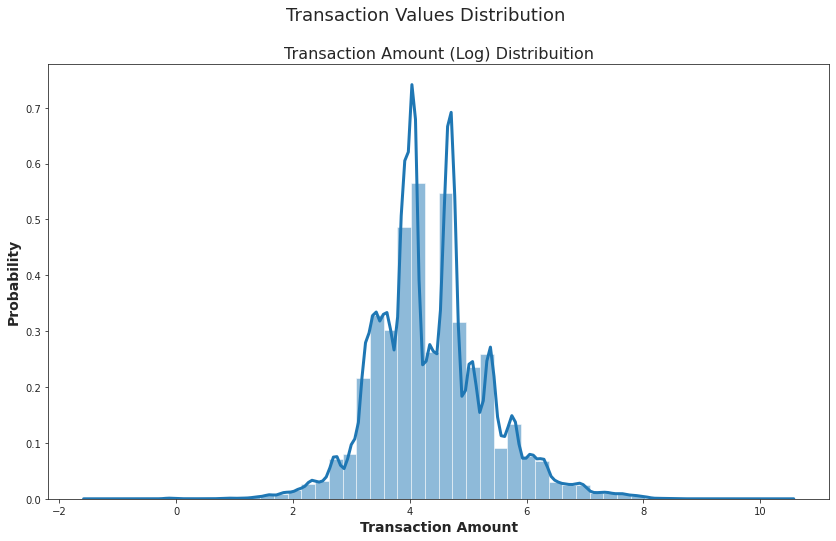

In [ ]:
# Distribution plot of Transaction Amount less than 1000
plt.figure(figsize=(14,8))
sns.set_style('ticks')
plt.suptitle('Transaction Values Distribution', fontsize=18)
sns.distplot(np.log(df['TransactionAmt']),kde_kws= {'lw': 3},hist_kws= {'alpha' : 0.5})
plt.title("Transaction Amount (Log) Distribuition", fontsize=16)
plt.xlabel("Transaction Amount",weight = 'bold', fontsize=14)
plt.ylabel("Probability", weight = 'bold', fontsize=14)

plt.show()

**Inferences:**

- Transaction Amount is Right Skewed.
- Most of the transactions lie in < $200 range
- Log of Transaction Amount is almost Normally Distributed, so we will use log of Transaction Amount while building the model


### Product Code Features

- Distribution of Product Code
- Distribution of Frauds by Product Code

In [ ]:
def plot_cat_feat_dist(df, col):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

    plt.figure(figsize=(16,13))
    plt.suptitle(f'{col} Distributions', fontsize=22)

    plt.subplot(221)
    g = sns.countplot(x=col, data=df, order=tmp[col].values, lw = 1, ec = 'black')
    plt.grid(alpha = 0.5,axis = 'y')

    g.set_title(f"{col} Distribution", fontsize=16)
    g.set_xlabel(f"{col} Name", fontsize=17)
    g.set_ylabel("Count", fontsize=17)
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=14) 

    plt.subplot(222)
    g1 = sns.countplot(x=col, hue='isFraud', data=df, order=tmp[col].values, lw = 1, ec = 'black')
    plt.grid(alpha = 0.5,axis = 'y')
    plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
    gt = g1.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, color='black',linestyles='--', order=tmp[col].values, legend=False)
    gt.set_ylabel("% of Fraud Transactions", fontsize=16)

    g1.set_title(f"{col} Distribution by Target Variable (isFraud) ", fontsize=16)
    g1.set_xlabel(f"{col} Name", fontsize=17)
    g1.set_ylabel("Count", fontsize=17)


    plt.subplots_adjust(hspace = 0.4, top = 0.85)

    plt.show()

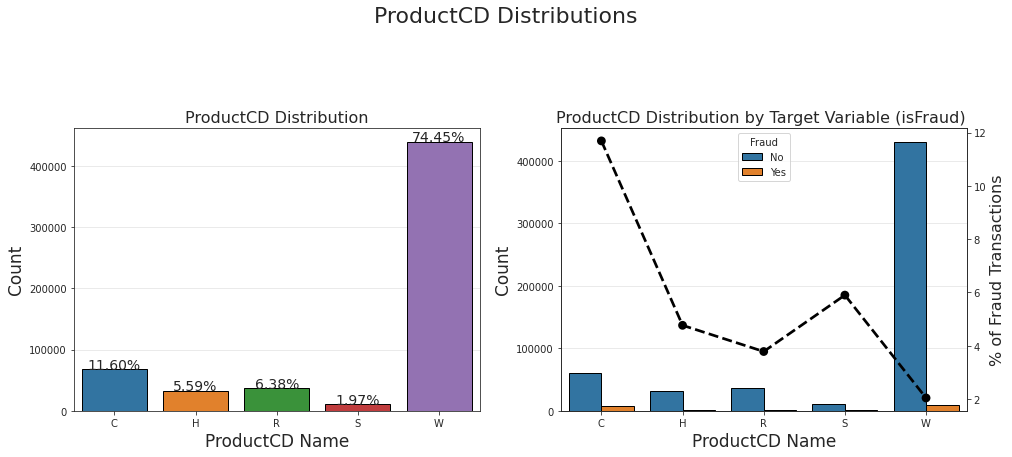

In [ ]:
plot_cat_feat_dist(df, "ProductCD")

In [ ]:
# Average fraud % per transaction by ProductCD
df.groupby('ProductCD')['isFraud'].mean().sort_values(ascending=False)*100

ProductCD
C    11.687269
S     5.899553
H     4.766231
R     3.782594
W     2.039939
Name: isFraud, dtype: float64

**Inferences:**

- 74.5% of the transactions are for Product Code 'W'
- 11.6% of the transactions are for Product Code 'C'
- Fraud Transaction Rate is Maximum for Product Category 'C' and minimum for Product Category 'W'

### Card Features

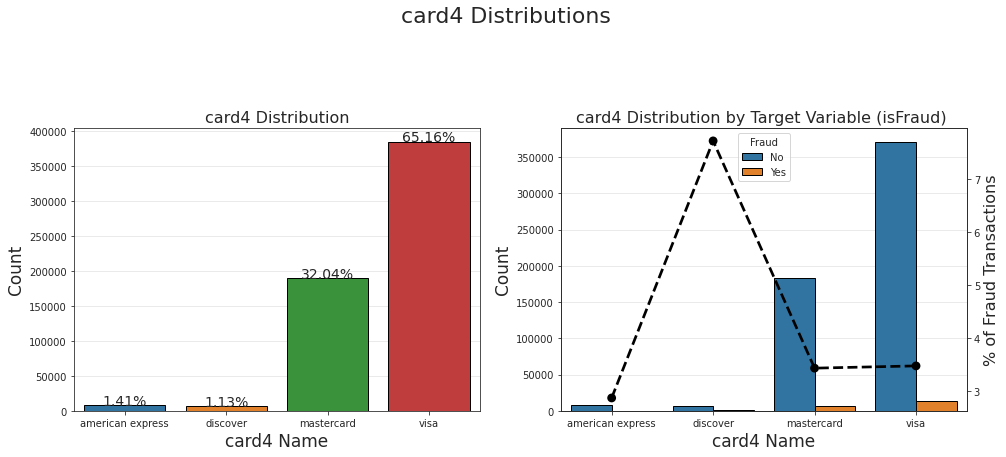

In [ ]:
# Card 4
plot_cat_feat_dist(df, "card4")

In [ ]:
# Average fraud % per transaction by Card4
df.groupby('card4')['isFraud'].mean().sort_values(ascending=False)*100

card4
discover            7.728161
visa                3.475610
mastercard          3.433095
american express    2.869837
Name: isFraud, dtype: float64

**Inferences:**

- 97% of transactions are from Mastercard(32%) and Visa(65%)
- Fraud Transaction Rate is highest for Discover cards(7.72%) against 3.47% of Visa, 3.43% of Mastercard and 2.86% in American Express

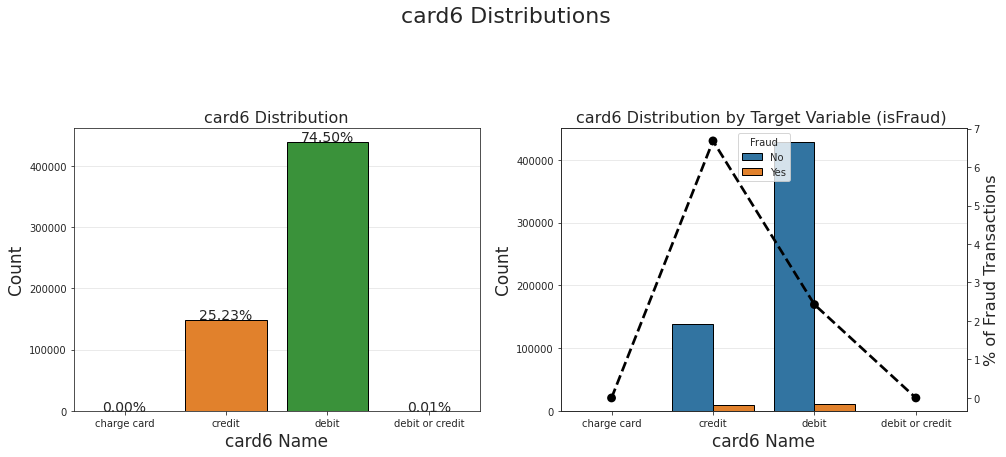

In [ ]:
# Card 6
plot_cat_feat_dist(df, "card6")

In [ ]:
# Average fraud % per transaction by Card6
df.groupby('card6')['isFraud'].mean().sort_values(ascending=False)*100

card6
credit             6.678480
debit              2.426251
charge card        0.000000
debit or credit    0.000000
Name: isFraud, dtype: float64

**Inferences:**

- About 74.5% transactions are from Credit Card and 25.23% are from Debit cards. 
- Debit card transactions are almost 3 times as compared to credit card transactions.
- Fraud Transaction Rate is high for Credit cards (6.67%) as compared to Debit cards (2.4%).


### P_email Domain Feature



- It has multiple domains, let's group them by the respective enterprises
- Set all values with less than 500 entries as "Others"

In [ ]:
df.loc[df['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

df.loc[df['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'
df.loc[df['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
df.loc[df.P_emaildomain.isin(df.P_emaildomain\
                                         .value_counts()[df.P_emaildomain.value_counts() <= 500 ]\
                                         .index), 'P_emaildomain'] = "Others"
df.P_emaildomain.fillna("NoInf", inplace=True)

In [ ]:
def plot_cat_with_amt(df, col, lim=2000):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{col} Distributions ', fontsize=24)
    
    plt.subplot(211)
    g = sns.countplot( x=col,  data=df, order=list(tmp[col].values),lw = 1, ec = 'black', palette= 'Paired')
    plt.grid(alpha = 0.5,axis = 'y')
    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False,linestyles='--' )
    gt.set_ylim(0,tmp['Fraud'].max()*1.1)
    gt.set_ylabel("%Fraud Transactions", fontsize=16)
    g.set_title(f"Share of {col} categories and % of Fraud Transactions", fontsize=18)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    g.set_ylim(0,max(sizes)*1.15)
    
    #########################################################################
    perc_amt = (df.groupby(['isFraud',col])['TransactionAmt'].sum() \
                / df.groupby([col])['TransactionAmt'].sum() * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    amt = df.groupby([col])['TransactionAmt'].sum().reset_index()
    perc_amt = perc_amt.fillna(0)
    plt.subplot(212)
    g1 = sns.barplot(x=col, y='TransactionAmt', 
                       data=amt, 
                       order=list(tmp[col].values),lw = 1, ec = 'black',palette= 'Paired')
    plt.grid(alpha = 0.5,axis = 'y')
    g1t = g1.twinx()
    g1t = sns.pointplot(x=col, y='Fraud', data=perc_amt, 
                        order=list(tmp[col].values),
                       color='black', legend=False,linestyles='--' )
    g1t.set_ylim(0,perc_amt['Fraud'].max()*1.1)
    g1t.set_ylabel("%Fraud Total Amount", fontsize=16)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    g1.set_title(f"Transactions amount by {col} categories and % of Fraud Transactions (Amounts)", fontsize=18)
    g1.set_xlabel(f"{col} Category Names", fontsize=16)
    g1.set_ylabel("Transaction Total Amount(U$)", fontsize=16)
    g1.set_xticklabels(g.get_xticklabels(),rotation=45)    
    
    for p in g1.patches:
        height = p.get_height()
        g1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_amt*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()
    

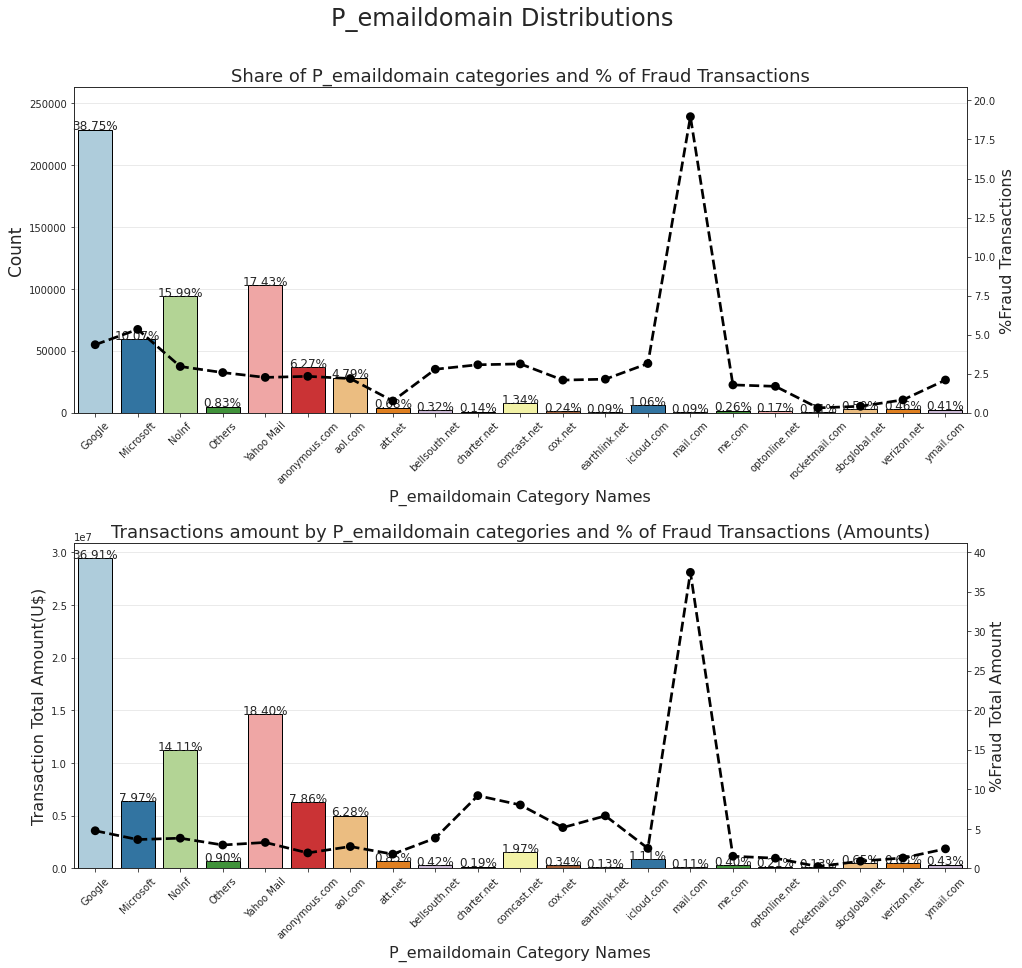

In [ ]:
plot_cat_with_amt(df, 'P_emaildomain')

In [ ]:
# Average fraud % per transaction by P_emaildomain
df.groupby('P_emaildomain')['isFraud'].mean().sort_values(ascending = False)*100

P_emaildomain
mail.com          18.962433
Microsoft          5.329791
Google             4.349555
icloud.com         3.143450
comcast.net        3.118661
charter.net        3.063725
NoInf              2.953756
bellsouth.net      2.776323
Others             2.564624
anonymous.com      2.321747
Yahoo Mail         2.254419
aol.com            2.181060
earthlink.net      2.140078
ymail.com          2.086811
cox.net            2.081838
me.com             1.773982
optonline.net      1.681503
verizon.net        0.813309
att.net            0.743863
sbcglobal.net      0.404040
rocketmail.com     0.301205
Name: isFraud, dtype: float64

**Inferences:**

- About 38.78% transactions are from Google  and 17.43% from Yahoo Mail with P_emaildomain
- Highest Fraud % Rate are from mail.com (18.96%)
- There isn't any information about P_emaildomain of around 16% transactions in terms of count and 14.11% in terms of amount
- Fraud Transaction Rate for Microsoft (5.32%) is high as compared to Google (4.34%) and Yahoo mail (2.25%)
- Fraud Transaction Rate (Amount) for Google is high as comapred to Microsoft and Yahoo mail

### R_email Domain Feature

- It has multiple domains, let's group them by the respective enterprises
- Set all values with less than 500 entries as "Others

In [ ]:
df.loc[df['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

df.loc[df['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'
df.loc[df['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
df.loc[df.R_emaildomain.isin(df.R_emaildomain\
                                         .value_counts()[df.R_emaildomain.value_counts() <= 300 ]\
                                         .index), 'R_emaildomain'] = "Others"
df.R_emaildomain.fillna("NoInf", inplace=True)

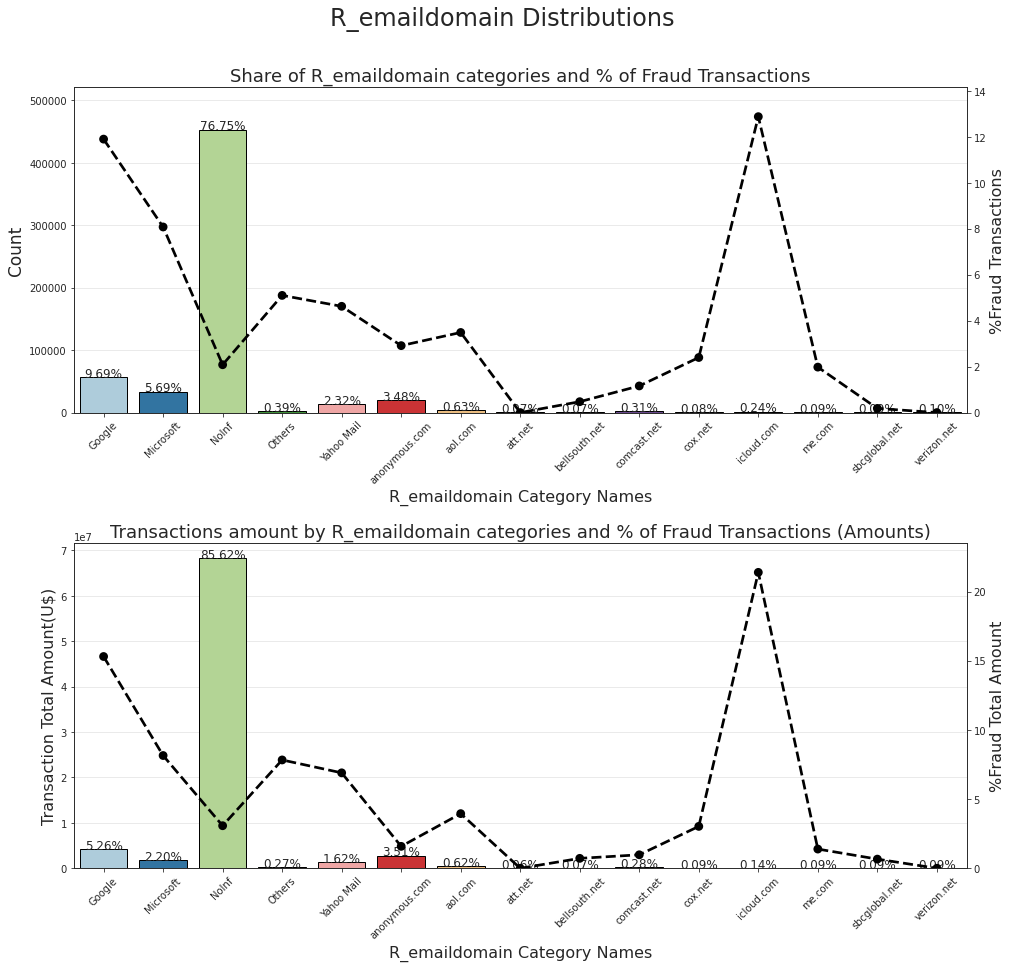

In [ ]:
plot_cat_with_amt(df, 'R_emaildomain')

In [ ]:
# Average fraud % per transaction by P_emaildomain
df.groupby('R_emaildomain')['isFraud'].mean().sort_values(ascending = False)*100

R_emaildomain
icloud.com       12.875536
Google           11.898606
Microsoft         8.076419
Others            5.098901
Yahoo Mail        4.623475
aol.com           3.485544
anonymous.com     2.912952
cox.net           2.396514
NoInf             2.081858
me.com            1.978417
comcast.net       1.158940
bellsouth.net     0.473934
sbcglobal.net     0.181159
att.net           0.000000
verizon.net       0.000000
Name: isFraud, dtype: float64

**Inferences:**

- There isn't any information about R_emaildomain for Majority of transactions (76.75% by Count , 85.62% by Amount)
- Highest Fraud % Transaction Rate is for icloud.com (12.87%)
- Fraud Transaction Rate for Google (11.89%) is high as compared to Microsoft (8.07%) and Yahoo (4.62%)


### Days of the Month


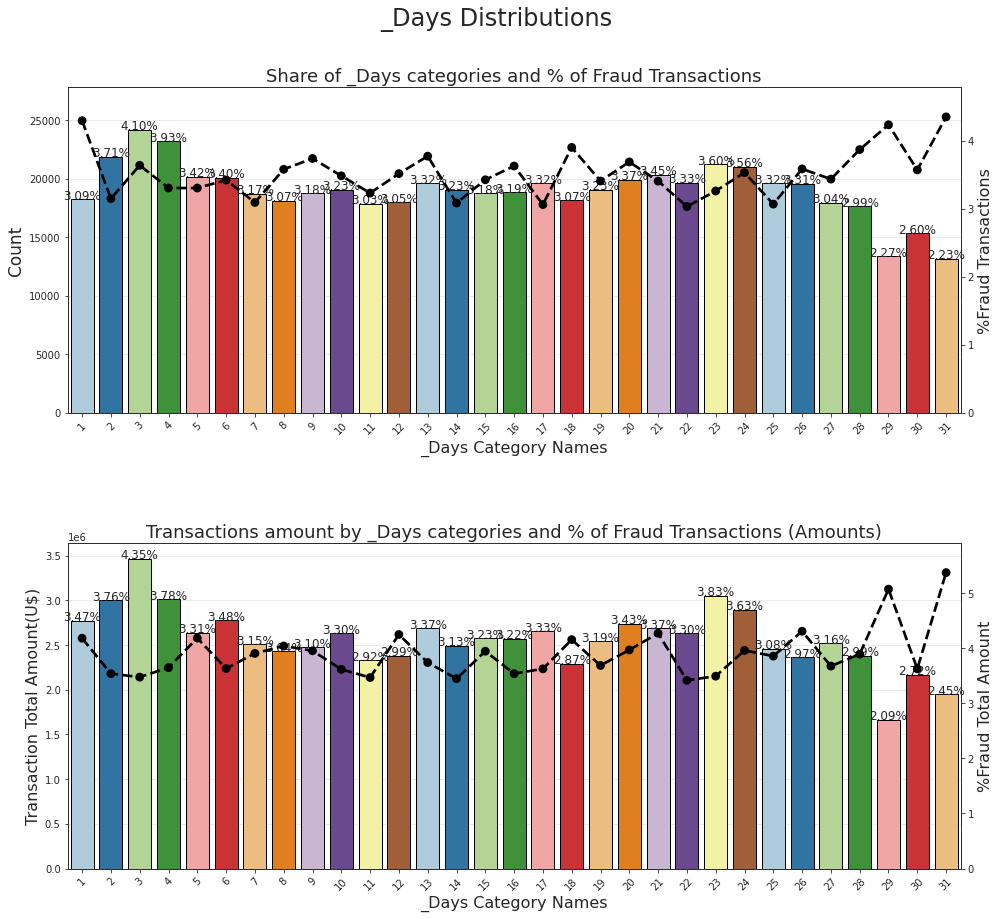

In [ ]:
plot_cat_with_amt(df, '_Days')

In [ ]:
# Average fraud % per transaction by Days of Month
df.groupby('_Days')['isFraud'].mean().sort_values(ascending = False)*100

_Days
31    4.353442
1     4.298073
29    4.237985
18    3.904615
28    3.872721
13    3.775796
9     3.741750
20    3.690871
3     3.640947
16    3.630766
26    3.588407
8     3.582271
30    3.573986
24    3.533720
12    3.518817
10    3.486421
27    3.438092
15    3.428450
6     3.423737
19    3.410341
21    3.408979
4     3.307066
5     3.306931
23    3.263579
11    3.232843
2     3.151548
7     3.094654
14    3.086776
25    3.070489
17    3.063669
22    3.034307
Name: isFraud, dtype: float64

**Inferences:**

- Highest fraud % transactions is towards the beginning and the end of the month. Might be accelerated at the time of receiving pay-checks.

- Day 31 (4.35%), Day 1 (4.29%) and Day 29 (4.23%) are having high Fraud % Transaction Rate

- Incidentally, fraud transaction rate is high on the days when number of transactions are less.

- Day 29,30 and 31 are having less transactions, looks like people are mpre cautious with spending in end of the month.

### Days of the week


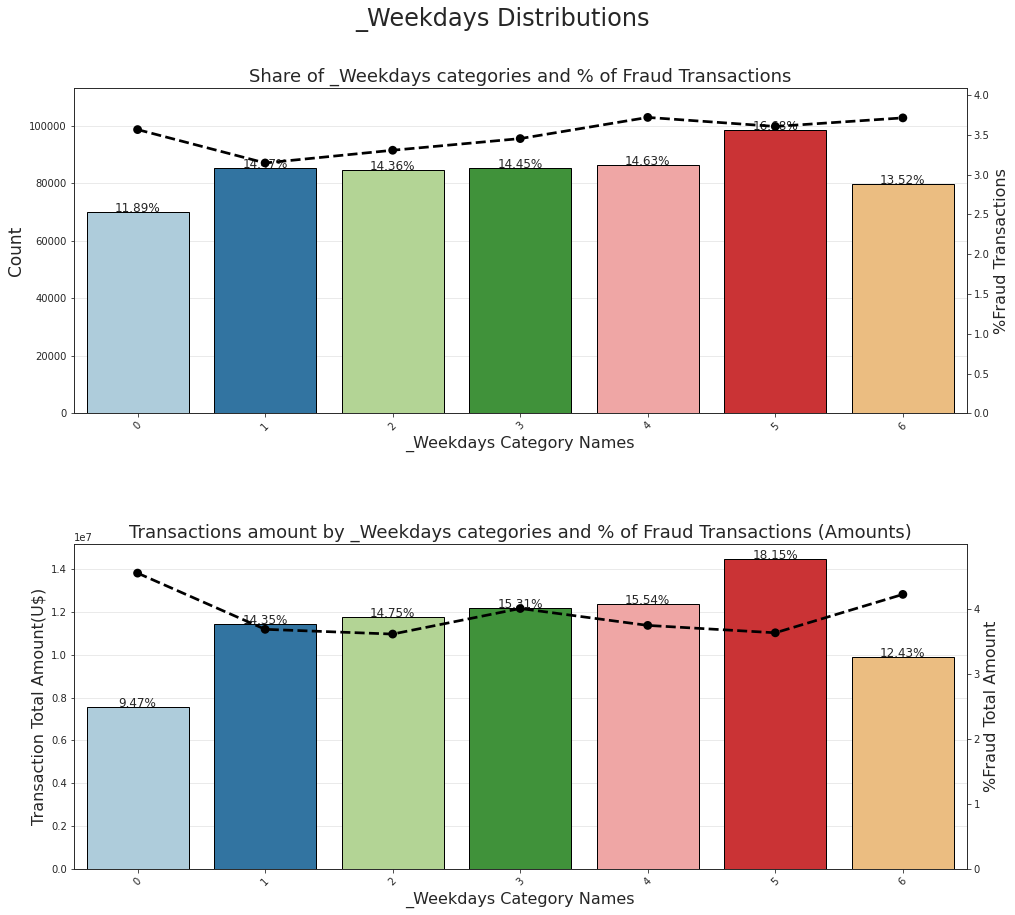

In [ ]:
plot_cat_with_amt(df, '_Weekdays')

In [ ]:
# Average fraud % per transaction by Days of Week
df.groupby('_Weekdays')['isFraud'].mean().sort_values(ascending = False)*100

_Weekdays
4    3.717425
6    3.711451
5    3.603988
0    3.564359
3    3.451427
2    3.304840
1    3.145155
Name: isFraud, dtype: float64

**Inferences:**
- 0 = Sunday, 1= Monday, 2 = Tuesday, 3 = Wednesday, 4 = Thursday, 5 = Friday, 6 = Saturday
- Highest Fraud % Transaction rate is on Thursday and Saturday with 3.71% 
- Surprisingly Fraud transaction rate is high on the days when number of transactions and transaction amounts are less (Day 0 & Day 6). 

### Hour of the Day

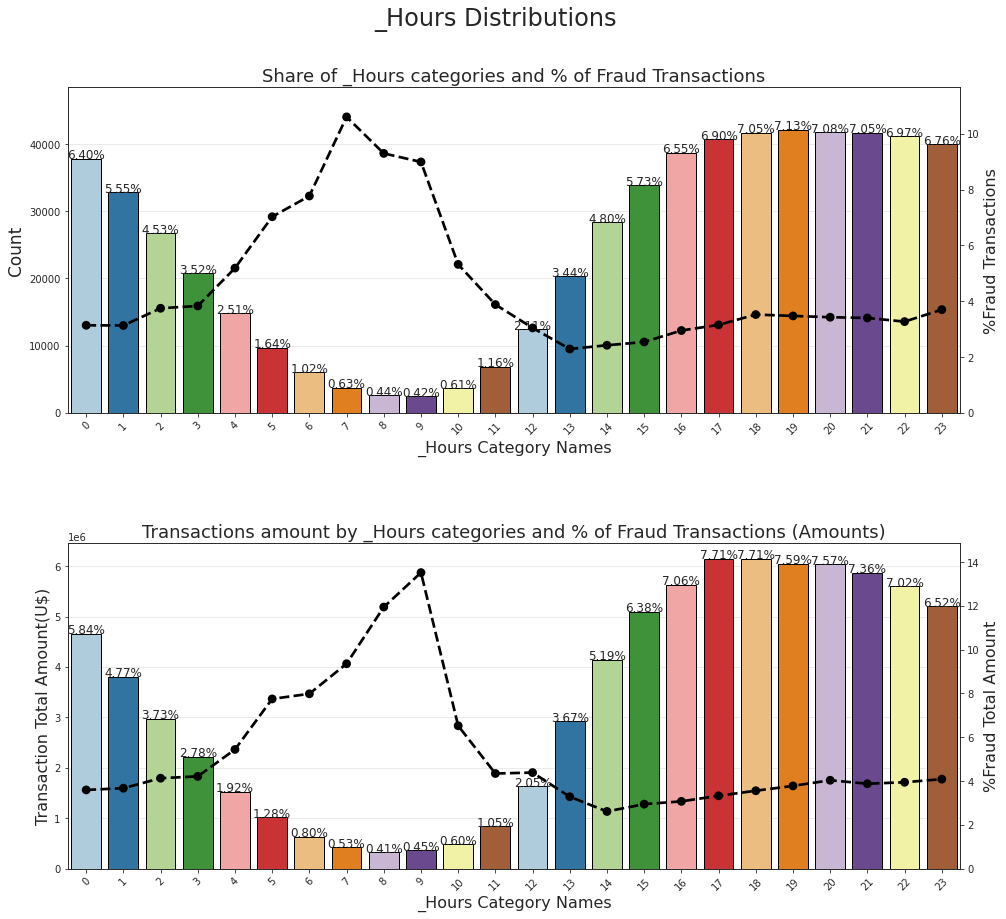

In [ ]:
plot_cat_with_amt(df, '_Hours')

In [ ]:
# Average fraud % per transaction by Hour of the Day
df.groupby('_Hours')['isFraud'].mean().sort_values(ascending = False)*100

_Hours
7     10.610151
8      9.301428
9      8.995563
6      7.774263
5      7.030203
10     5.321202
4      5.189029
11     3.881646
3      3.831362
2      3.748317
23     3.699717
18     3.523139
19     3.473822
20     3.427313
21     3.400495
22     3.269404
17     3.153009
0      3.137981
1      3.131384
12     3.043932
16     2.951057
15     2.539945
14     2.421632
13     2.288949
Name: isFraud, dtype: float64

**Inferences:**
- Highest Fraud % Transaction Rate is from 7 AM (10.61%) followed by 8 AM (9.3%) and 9 AM (8.99%)
- Transactions start decreasing from 12 AM TO 12PM but the fraud rate starts increasing
- Transactions from 3 AM to 12 PM should be monitored very closely due to high fraudulent transactions in this period

### Device Type

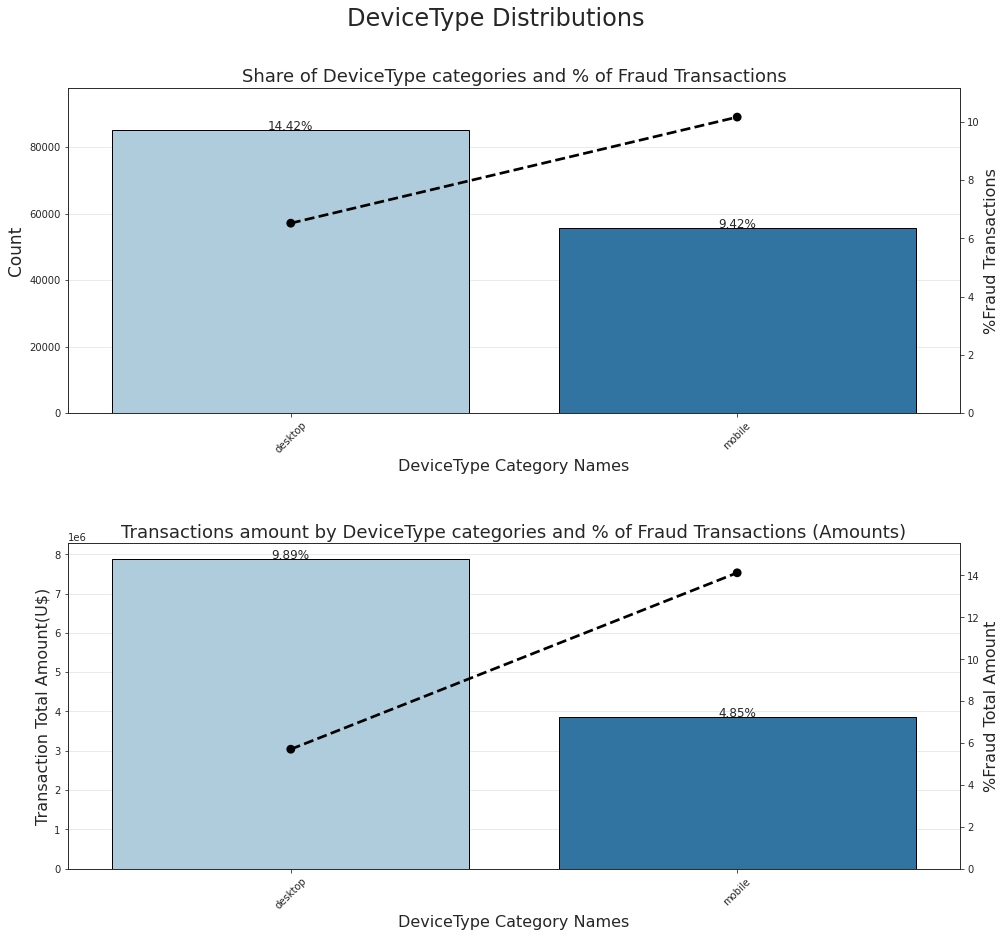

In [ ]:
plot_cat_with_amt(df, "DeviceType")

In [ ]:
# Average fraud % per transaction by Hour of the Day
df.groupby('DeviceType')['isFraud'].mean().sort_values(ascending = False)*100

DeviceType
mobile     10.166232
desktop     6.521458
Name: isFraud, dtype: float64

**Inferences:**
- Highest Fraud % Transaction is from Mobile Device Type with 10.16%
- Device type is known for only 24% of the transactions

### Identity Data Columns

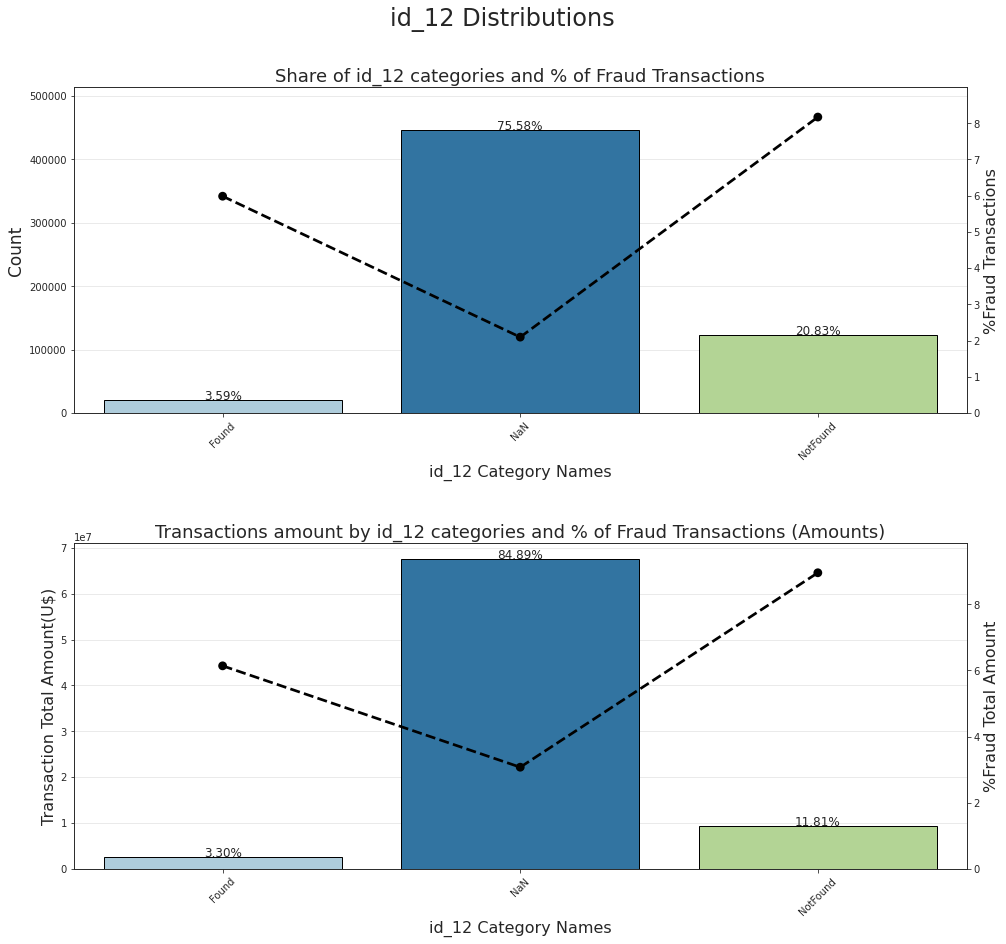

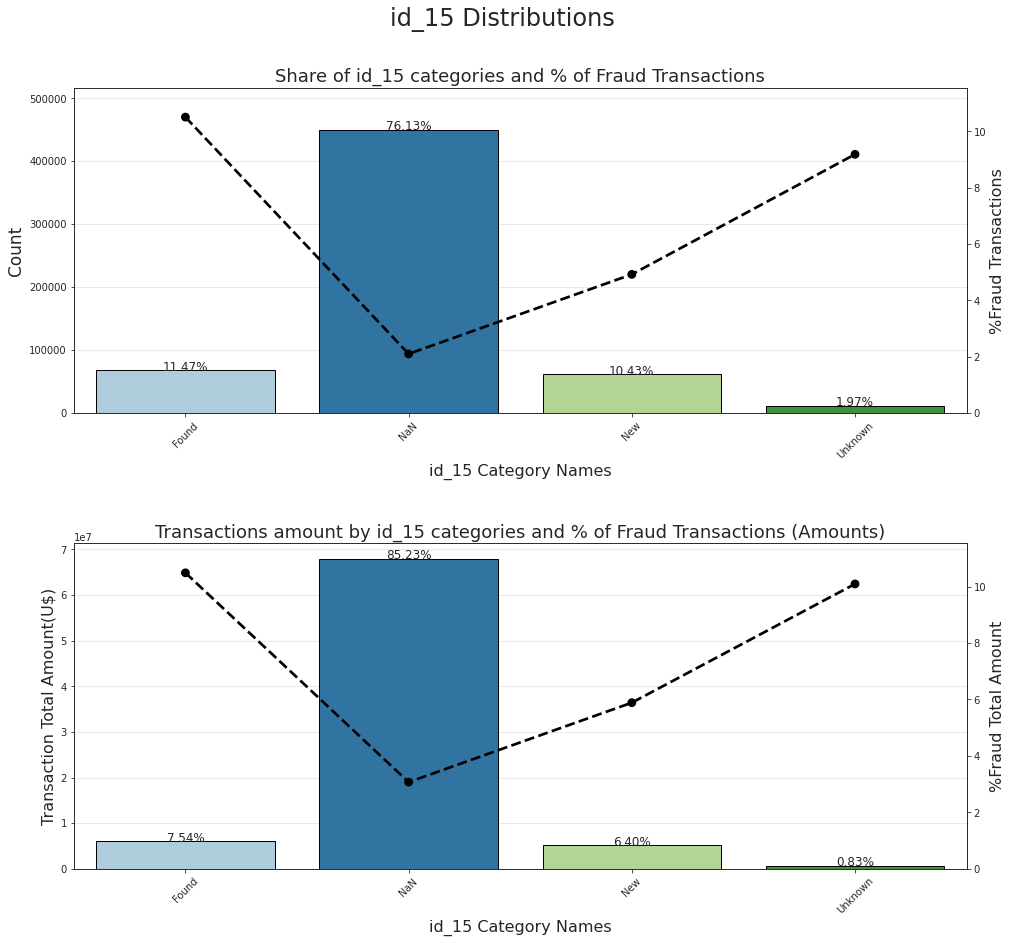

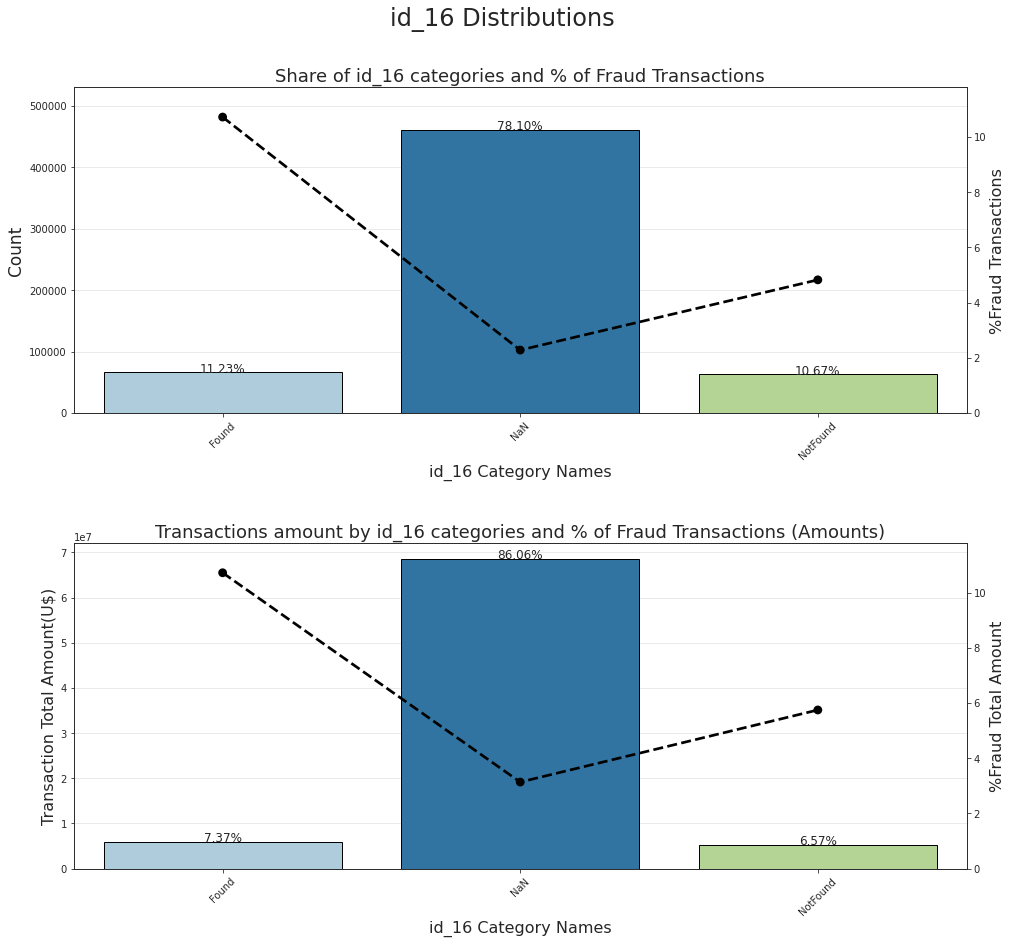

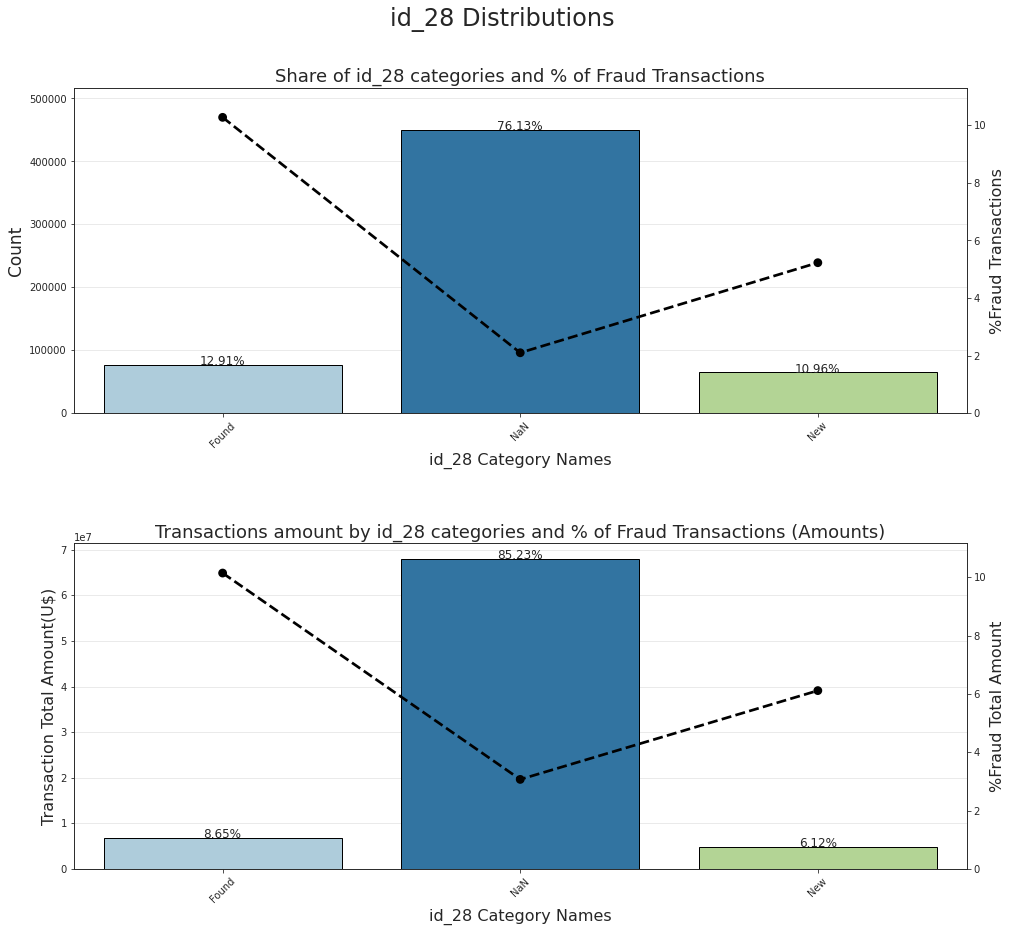

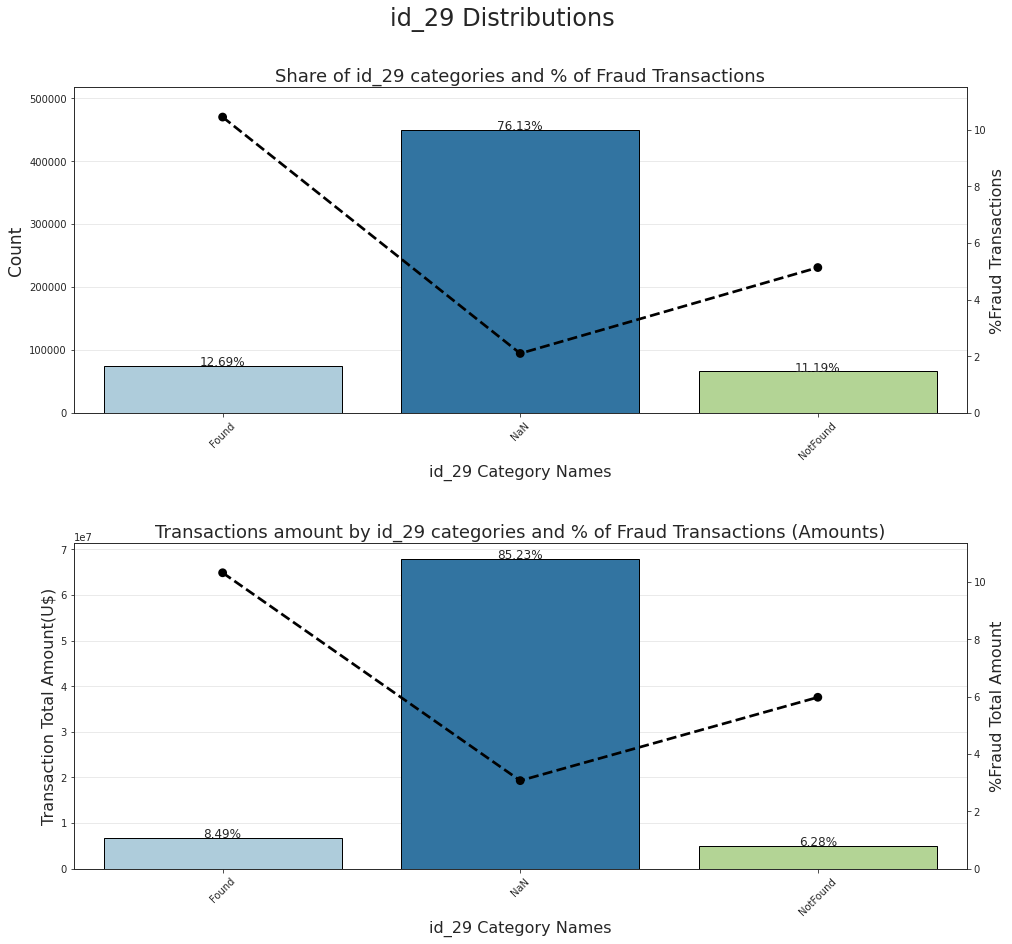

In [ ]:
for col in ['id_12', 'id_15', 'id_16', 'id_28', 'id_29']:
    df[col] = df[col].fillna('NaN')
    plot_cat_with_amt(df, col)

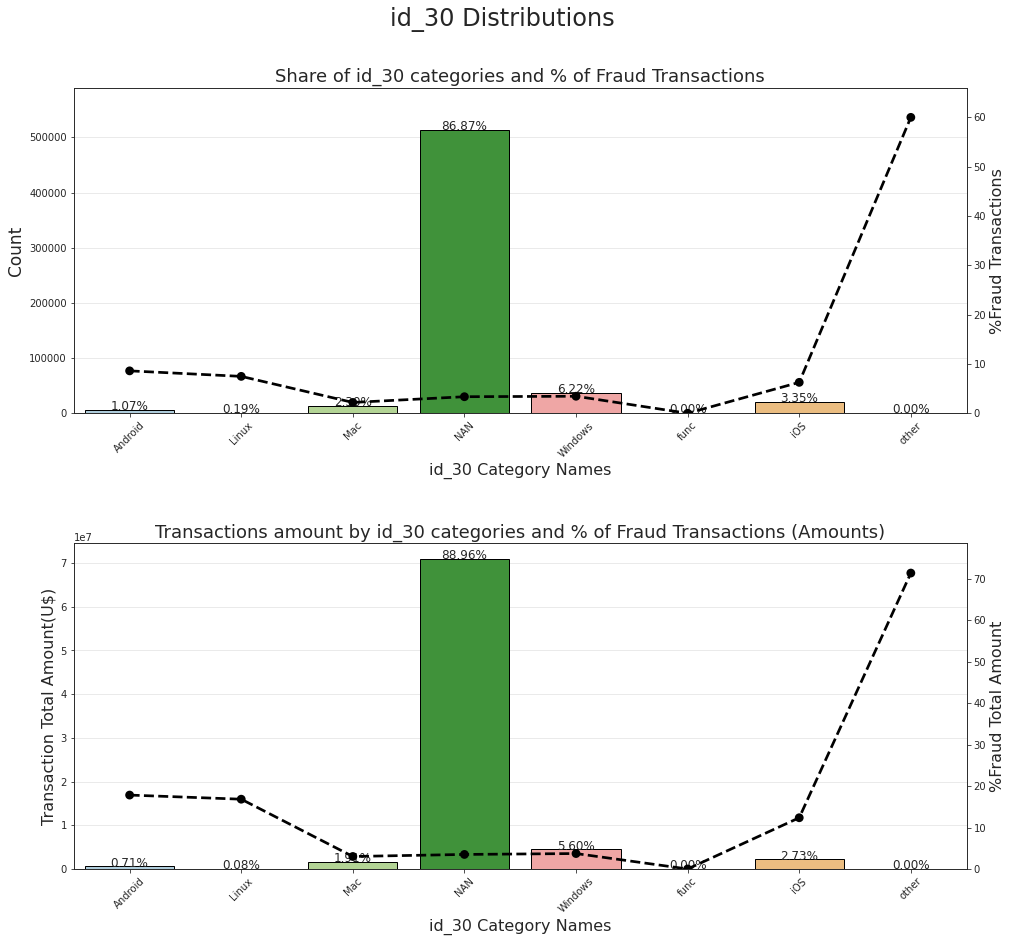

In [ ]:
df.loc[df['id_30'].str.contains('Windows', na=False), 'id_30'] = 'Windows'
df.loc[df['id_30'].str.contains('iOS', na=False), 'id_30'] = 'iOS'
df.loc[df['id_30'].str.contains('Mac OS', na=False), 'id_30'] = 'Mac'
df.loc[df['id_30'].str.contains('Android', na=False), 'id_30'] = 'Android'
df['id_30'].fillna("NAN", inplace=True)

plot_cat_with_amt(df, "id_30")

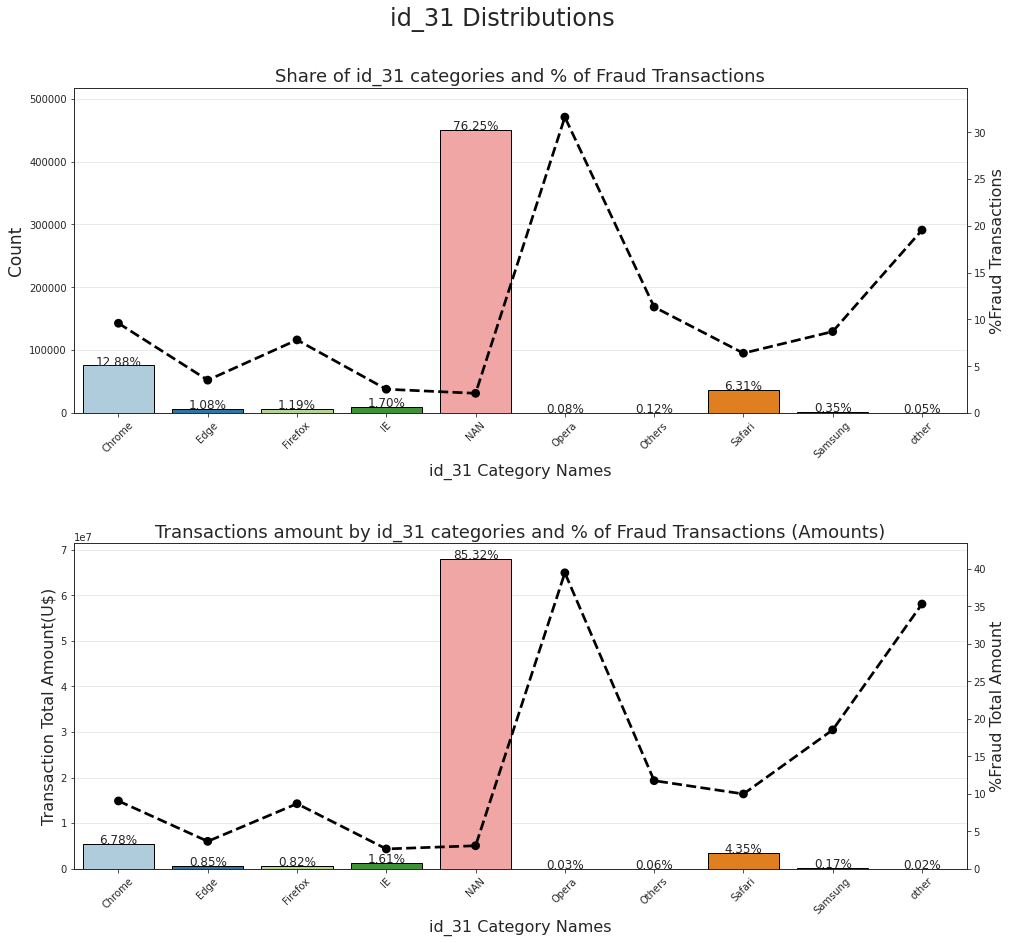

In [ ]:
df.loc[df['id_31'].str.contains('chrome', na=False), 'id_31'] = 'Chrome'
df.loc[df['id_31'].str.contains('firefox', na=False), 'id_31'] = 'Firefox'
df.loc[df['id_31'].str.contains('safari', na=False), 'id_31'] = 'Safari'
df.loc[df['id_31'].str.contains('edge', na=False), 'id_31'] = 'Edge'
df.loc[df['id_31'].str.contains('ie', na=False), 'id_31'] = 'IE'
df.loc[df['id_31'].str.contains('samsung', na=False), 'id_31'] = 'Samsung'
df.loc[df['id_31'].str.contains('opera', na=False), 'id_31'] = 'Opera'
df['id_31'].fillna("NAN", inplace=True)
df.loc[df.id_31.isin(df.id_31.value_counts()[df.id_31.value_counts() < 200].index), 'id_31'] = "Others"
plot_cat_with_amt(df, "id_31")


### Exploring Column Types

In [ ]:
#Creating Category Columns
cat_columns = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_columns))

Number of Categorical Features are :  29


In [ ]:
#Creating Binary Columns
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
print("Number of Binary Columns are : ",len(binary_columns))

Number of Binary Columns are :  435


In [ ]:
#Creating Numerical Columns
num_columns = [col for col in df.columns if (col not in cat_columns) & (col not in binary_columns)]
print("Number of Numerical Columns are : ",len(num_columns))

Number of Numerical Columns are :  389


In [ ]:
cat_columns = cat_columns + binary_columns

### Summary of EDA

- The target class in imbalanced
- Only 3.5% transactions are fraud in terms of count and 3.87% in terms of transaction amount
- `TransactionAmt` is right skewed so log transform needs to be used to make it normally distributed  
- Fraud Transaction rate is maximum for Product Category C and minimum for Product Category W
- 97% of transactions are from Mastercard(32%) and Visa(65%
- Fraud transaction rate is highest for discover cards(~8%) against ~3.5% of Mastercard and Visa and 2.87% in American Express
- Almost all the transactions are from Credit and Debit cards. 
- Debit card transactions are almost 3 times as compared to credit card transactions.
- Fraud transaction rate is high for Credit cards as compared to Debit cards.
- Fraud transaction rate for Microsoft is high as compared to Google and Yahoo mail  # p emaildomain
- Fraud transaction rate (amount) for Google is high as comapred to Microsoft and Yahoo mail #p emaildomain
- There isn't any information about R_emaildomain for Majority of transactions (76.75% count , 85.62% amount) #r emaildomain
- Fraud transaction rate for Google is high as compared to Yahoo, anaonymous.com and Microsoft #r emaildomain
- Surprisingly fraud transaction rate is high on the days when number of transactions are less
- Day 29,30 and 31 are having less transactions, looks like people are broke at the month end 
- Surprisingly fraud transaction rate is high on the days when number of transactions and transaction amounts are less. Day 0 and 6
- Day 0 and 6 have less transactions, these might be weekend days
- Transactions start decreasing mid night but the fraud rate starts increasing
- Transactions from 3 AM to 12 PM needs to monitored very closely 

# 7. Statistical Significance Test

### Chi Square Test for Categorical Columns

To understand whether a given categorical feature has any statistical significant relationship with Y (Target Variable 'isFraud')



In [ ]:
from   scipy.stats import chi2_contingency

In [ ]:
# Set the Significance value
#alpha = 0.05

# Create an Empty List to store significant categorical features
#significant_categorical_variables = []

# Iterate through Categorical Columns
#for col in cat_columns:  

    # Create a crosstab table with a dataframe 'temp'
    #temp = pd.crosstab(df[col],df['isFraud'].astype('category'))
    
    # Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
    #stat, p, dof, expected = chi2_contingency(temp)
    #print(col.ljust(40), ',  chisquared=%.5f,   p-value=%.5f' % (stat, p))

    # Determine whether to reject or accept your null hypothesis
    #if p <= alpha:
        #significant_categorical_variables.append(col)
    #else:
        #""

In [ ]:
# Significant variables
#print('Number of Significant Categorical Variables are: ',len(significant_categorical_variables))
#print(significant_categorical_variables)

### Calculate Odds & Odds Ratio



- Chi-Square test tells if the entire variable is useful or not.
- Odds test tells which  category is important/useful in a categorical variable 

In [ ]:
ctab = pd.crosstab(df['ProductCD'], df['isFraud'].astype('category'))
ctab

isFraud,0,1
ProductCD,,
C,60511,8008
H,31450,1574
R,36273,1426
S,10942,686
W,430701,8969


In [ ]:
ctab.columns = ctab.columns.add_categories('odds')
ctab['odds'] = ctab[1]/ctab[0]
ctab

isFraud,0,1,odds
ProductCD,,,
C,60511,8008,0.132340
H,31450,1574,0.050048
R,36273,1426,0.039313
S,10942,686,0.062694
W,430701,8969,0.020824


In [ ]:
ctab.columns = ctab.columns.add_categories('odds_ratio')
ctab['odds_ratio'] = ctab['odds'] / (ctab[1].sum()/ctab[0].sum())
ctab

isFraud,0,1,odds,odds_ratio
ProductCD,,,,
C,60511,8008,0.132340,3.649871
H,31450,1574,0.050048,1.380295
R,36273,1426,0.039313,1.084236
S,10942,686,0.062694,1.729080
W,430701,8969,0.020824,0.574323


**Inferences:**

- Higher odds ratio implies more chance of fraud in a category of a categorical feature. 

- Farther away it is from 1.0 (both directions) more important the variable is.

### ANOVA Test

In [ ]:
from scipy.stats import f_oneway

In [ ]:
# Set the Significance value
#alpha = 0.05

# Create an Empty List to store significant numerical features
#significant_numerical_variables = []

# Iterate through Numerical Columns
#for col in num_columns[2:]:

    # Determine whether to reject or keep your null hypothesis
    #if df.loc[:, col].nunique() > 50:

      # Get F-statistic and P-value
        #F, p = f_oneway(df[df.isFraud == 1][col].dropna(),
                       # df[df.isFraud == 0][col].dropna())
        #print(col.ljust(40), ',   F-statistic=%.5f, p=%.5f' % (F, p), df.loc[:, col].nunique())
        #if p <= alpha:
            #significant_numerical_variables.append(col)

In [ ]:
# Significant variables
#print('Number of Significant Numerical Variables are: ',len(significant_numerical_variables))
#print(significant_numerical_variables)

# 7. Feature Engineering

Feature engineering is the process of using domain and statistical knowledge to extract features from raw data via data mining techniques. 

These features often help to improve the performance of machine learning models.


The goal of this section is to:
- Engineer Domain specific features
- Principal Component Analysis PCA - Dimensionality Reduction
- Encode the Categorical features

In [ ]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,...,V134_missing_flag,V135_missing_flag,V136_missing_flag,V137_missing_flag,V138_missing_flag,V139_missing_flag,V140_missing_flag,V141_missing_flag,V142_missing_flag,V143_missing_flag,V144_missing_flag,V145_missing_flag,V146_missing_flag,V147_missing_flag,V148_missing_flag,V149_missing_flag,V150_missing_flag,V151_missing_flag,V152_missing_flag,V153_missing_flag,V154_missing_flag,V155_missing_flag,V156_missing_flag,V157_missing_flag,V158_missing_flag,V159_missing_flag,V160_missing_flag,V161_missing_flag,V162_missing_flag,V163_missing_flag,V164_missing_flag,V165_missing_flag,V166_missing_flag,V167_missing_flag,V168_missing_flag,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_missing_flag,V205_missing_flag,V206_missing_flag,V207_missing_flag,V208_missing_flag,V209_missing_flag,V210_missing_flag,V211_missing_flag,V212_missing_flag,V213_missing_flag,V214_missing_flag,V215_missing_flag,V216_missing_flag,V217_missing_flag,V218_missing_flag,V219_missing_flag,V220_missing_flag,V221_missing_flag,V222_missing_flag,V223_missing_flag,V224_missing_flag,V225_missing_flag,V226_missing_flag,V227_missing_flag,V228_missing_flag,V229_missing_flag,V230_missing_flag,V231_missing_flag,V232_missing_flag,V233_missing_flag,V234_missing_flag,V235_missing_flag,V236_missing_flag,V237_missing_flag,V238_missing_flag,V239_missing_flag,V240_missing_flag,V241_missing_flag,V242_missing_flag,V243_missing_flag,V244_missing_flag,V245_missing_flag,V246_missing_flag,V247_missing_flag,V248_missing_flag,V249_missing_flag,V250_missing_flag,V251_missing_flag,V252_missing_flag,V253_missing_flag,V254_missing_flag,V255_missing_flag,V256_missing_flag,V257_missing_flag,V258_missing_flag,V259_missing_flag,V260_missing_flag,V261_missing_flag,V262_missing_flag,V263_missing_flag,V264_missing_flag,V265_missing_flag,V266_missing_flag,V267_missing_flag,V268_missing_flag,V269_missing_flag,V270_missing_flag,V271_missing_flag,V272_missing_flag,V273_missing_flag,V274_missing_flag,V275_missing_flag,V276_missing_flag,V277_missing_flag,V278_missing_flag,V279_missing_flag,V280_missing_flag,V281_missing_flag,V282_missing_flag,V283_missing_flag,V284_missing_flag,V285_missing_flag,V286_missing_flag,V287_missing_flag,V288_missing_flag,V289_missing_flag,V290_missing_flag,V291_missing_flag,V292_miss

### Domain Specific Features

- We need to engineer the domain specific features. This might boost up the predictive power and gives better performing ML models

- Domain knowledge is one of the key pillars of data science. So always understand the domain before attempting the problem.

In [ ]:
# Transaction amount minus mean of transaction 
df['Trans_min_mean'] = df['TransactionAmt'] - np.nanmean(df['TransactionAmt'],dtype="float64")
df['Trans_min_std']  = df['Trans_min_mean'] / np.nanstd(df['TransactionAmt'].astype("float64"),dtype="float64")

In [ ]:
# Features for transaction amount and card 
df['TransactionAmt_to_mean_card1'] = df['TransactionAmt'] / df.groupby(['card1'])['TransactionAmt'].transform('mean')
df['TransactionAmt_to_mean_card4'] = df['TransactionAmt'] / df.groupby(['card4'])['TransactionAmt'].transform('mean')
df['TransactionAmt_to_std_card1']  = df['TransactionAmt'] / df.groupby(['card1'])['TransactionAmt'].transform('std')
df['TransactionAmt_to_std_card4']  = df['TransactionAmt'] / df.groupby(['card4'])['TransactionAmt'].transform('std')

In [ ]:
# Log of transaction amount
df['TransactionAmt'] = np.log(df['TransactionAmt'])

In [ ]:
# Save train df to csv file 
#df.to_csv("df_intermediate1.csv",index = False)

In [ ]:
# Read train df
# df = pd.read_csv("/content/df_intermediate1.csv")

### Dimensionality Reduction - PCA

- When dealing with high dimensional data, it is often useful to reduce the dimensionality by projecting the data to a lower dimensional subspace which captures the “essence” of the data.

- Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension.


- **Principal Component Analysis:** It is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

In [ ]:
# initialize function to perform PCA
from   sklearn.decomposition import PCA

def perform_PCA(df, cols, n_components, prefix='PCA_', rand_seed=4):
    pca = PCA(n_components=n_components, random_state=rand_seed)
    principalComponents = pca.fit_transform(df[cols])
    principalDf = pd.DataFrame(principalComponents)
    df.drop(cols, axis=1, inplace=True)

    principalDf.rename(columns=lambda x: str(prefix)+str(x), inplace=True)
    df = pd.concat([df, principalDf], axis=1)
    return df

Create a list of all the columns on which PCA needs to performed

In [ ]:
# Columns starting from V1 to V339
filter_col = df.columns[53:392]

Impute missing values in the columns and using minmax_scale function to scale the values in these columns

In [ ]:
from   sklearn.preprocessing import minmax_scale

# Fill na values and scale V columns
for col in filter_col:
    df[col] = df[col].fillna((df[col].min() - 2))
    df[col] = (minmax_scale(df[col], feature_range=(0,1)))

# Perform PCA    
df = perform_PCA(df, filter_col, prefix='PCA_V_', n_components=30)

In [ ]:
df.shape

(590540, 537)

Reduce memory usage of df as lot of new features have been created through PCA

In [ ]:
# Memory occupied by the dataframe (in mb)
df.memory_usage(deep=True).sum() / 1024**2 

1325.5511722564697

In [ ]:
df = reduce_mem_usage(df)

Memory usage decreased and optimised to 1271.49 Mb (4.1% reduction)


In [ ]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,...,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_missing_flag,V205_missing_flag,V206_miss

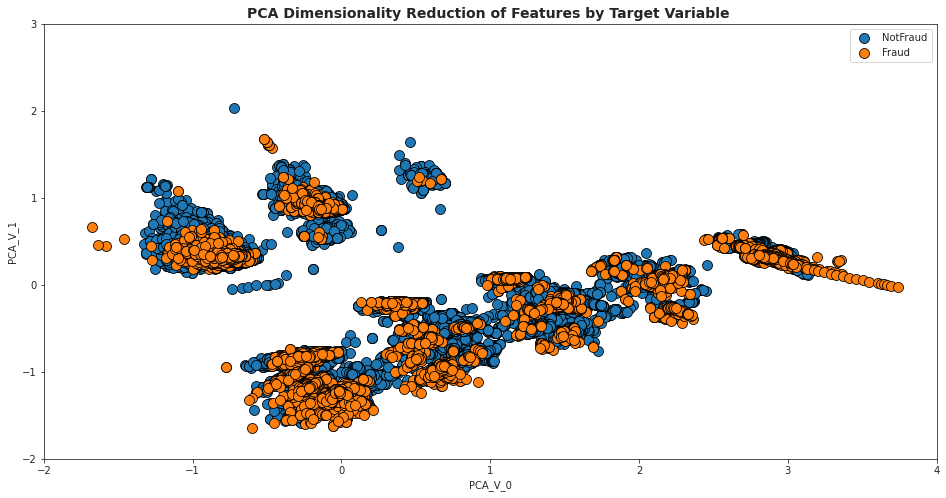

In [ ]:
# Plot first 2 PCA features and colour by target variable
plt.figure(figsize=(16, 8));
groups = df.groupby("isFraud")
for name, group in groups:
    ax = sns.scatterplot(group["PCA_V_0"], group["PCA_V_1"] , s = 100,edgecolor = 'black',palette = 'Paired')
    ax.set_title('PCA Dimensionality Reduction of Features by Target Variable ',fontsize = 14, weight='bold')
    ax.set(xlim =(-2,4))
    ax.set(ylim=(-2,3))

plt.legend(labels = ['NotFraud','Fraud'])
plt.show()

### Feature Encoding


- Encoding is the process of converting data from one form to another. Most of the Machine learning algorithms can not handle categorical values unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical columns are encoded.



- Create a list of variables that needs to be encoded using frequency encoding. 

- Let's note down the features which has more than 30 unique values,  We would using frequency encoding for these features only 

In [ ]:
#Creating Category Columns
cat_columns = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_columns))

Number of Categorical Features are :  29


In [ ]:
#Creating Binary Columns
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
print("Number of Binary Columns are : ",len(binary_columns))

Number of Binary Columns are :  428


In [ ]:
#Creating Numerical Columns
num_columns = [col for col in df.columns if (col not in cat_columns) & (col not in binary_columns)]
print("Number of Numerical Columns are : ",len(num_columns))

Number of Numerical Columns are :  93


In [ ]:
cat_columns = cat_columns + binary_columns

**Frequency Encoding**

It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on nature of the data

In [ ]:
# Frequecy encoding variables
frequency_encoded_variables = []
for col in cat_columns:
    if df[col].nunique() > 30:
        print(col, df[col].nunique())
        frequency_encoded_variables.append(col)

id_33 260
DeviceInfo 1786


In [ ]:
# Frequecny enocde the variables
from   tqdm import tqdm

for variable in tqdm(frequency_encoded_variables):
    # group by frequency 
    fq = df.groupby(variable).size()/len(df)    
    # mapping values to dataframe 
    df.loc[:, "{}".format(variable)] = df[variable].map(fq)  
    cat_columns.remove(variable) 
    

100%|██████████| 2/2 [00:00<00:00,  7.16it/s]


In [ ]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,...,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_missing_flag,V205_missing_flag,V206_miss

**Label encoding** 

- Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

- It is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.


In [ ]:
# Label encode the variables
from   sklearn.preprocessing import LabelEncoder

for col in cat_columns:
    lbl = LabelEncoder()
    lbl.fit(list(df[col].values))
    df[col] = lbl.transform(list(df[col].values))

# 8. Model Building

The goal of this section is to:
- Data Preprocess on columns
- Split the dataset into training and testing sets
- Build ML Models


### Data Preprocessing for Model Building

In [ ]:
df.loc[:, 'isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

Drop the Columns which may not be Important for ML Model Building

In [ ]:
df = df.drop(['TransactionID','TransactionDT','Date'], axis=1)

Let's reduce the memory usage as lot of new columns has been added to the data frame

In [ ]:
# Memory occupied by the dataframe (in mb)
df.memory_usage(deep=True).sum() / 1024**2 

2124.68155670166

In [ ]:
# Reduce memory usage
df = reduce_mem_usage(df)

Memory usage decreased and optimised to 375.44 Mb (82.3% reduction)


In [ ]:
# Save final df to csv file 
#df.to_csv("df.csv", index = False)

### Train-Test Split

Split the dataset into train set and test set. Train set will be used to train the model. Test set will be used to check the performance of model

In [ ]:
# Split the y variable series and X variables dataset
X = df.drop(['isFraud'],axis=1)
y = df.isFraud.astype(bool)

In [ ]:
# Split the dataset into the training set and test set
from   sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(413378, 533) (413378,)
(177162, 533) (177162,)


In [ ]:
# Head of X_train
X_train.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,V135_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_miss